# Import data

In [2]:
## import data##
from google.colab import files
upload=files.upload()

Saving DiamondDataSet.csv to DiamondDataSet.csv


In [3]:
import pandas as pd
from pathlib import Path

In [4]:
Diamonddata=pd.read_csv(Path("DiamondDataSet.csv"))

# Take a Quick Look at the Data Structure

In [5]:
Diamonddata.head()

,carat,cut,colour,clarity,Length,Width,height,depth ratio,table,Grading
0,1.20,Very Good,H,SI2,6.74,6.77,4.25,62.9,56.0,Mid
1,0.60,Ideal,G,VVS2,5.37,5.41,3.31,61.4,59.0,Mid
2,0.23,Ideal,G,IF,3.93,3.96,2.48,62.8,55.0,Low
3,1.51,Very Good,D,VS2,7.29,7.34,4.56,62.3,59.0,High
4,1.01,Very Good,D,VVS2,6.51,6.57,3.94,60.2,58.0,High


In [6]:
Diamonddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        10000 non-null  float64
 1   cut          10000 non-null  object 
 2   colour       10000 non-null  object 
 3   clarity      10000 non-null  object 
 4   Length       10000 non-null  float64
 5   Width        10000 non-null  float64
 6   height       10000 non-null  float64
 7   depth ratio  10000 non-null  float64
 8   table        10000 non-null  float64
 9   Grading      10000 non-null  object 
dtypes: float64(6), object(4)
memory usage: 781.4+ KB


In [7]:
Diamonddata.describe()

,carat,Length,Width,height,depth ratio,table
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.801591,5.738197,5.744263,3.545418,61.758790,57.453700
std,0.477550,1.131100,1.239754,0.753577,1.442807,2.243387
min,0.200000,0.000000,0.000000,0.000000,50.800000,49.000000
25%,0.400000,4.720000,4.720000,2.910000,61.100000,56.000000
50%,0.700000,5.690000,5.710000,3.530000,61.900000,57.000000
75%,1.050000,6.550000,6.550000,4.040000,62.500000,59.000000
max,4.130000,10.140000,58.900000,31.800000,71.800000,95.000000


In [8]:
Diamonddata.shape

(10000, 10)

In [9]:
Diamonddata = Diamonddata.drop(Diamonddata[Diamonddata["Length"]==0].index)
Diamonddata = Diamonddata.drop(Diamonddata[Diamonddata["Width"]==0].index)
Diamonddata = Diamonddata.drop(Diamonddata[Diamonddata["height"]==0].index)
Diamonddata.shape

(9996, 10)

# Data Cleaning

###Remove Outlier

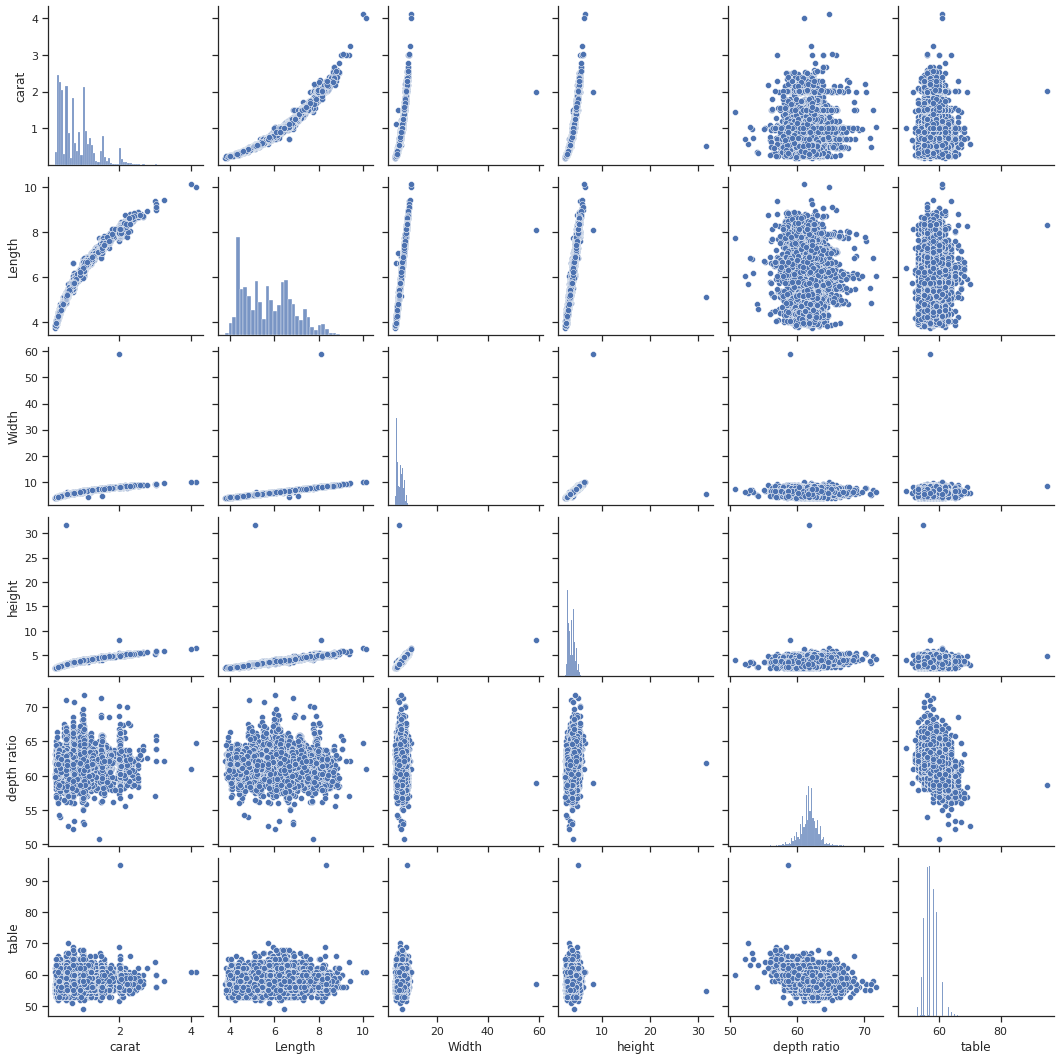

In [10]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
sns.pairplot(Diamonddata)

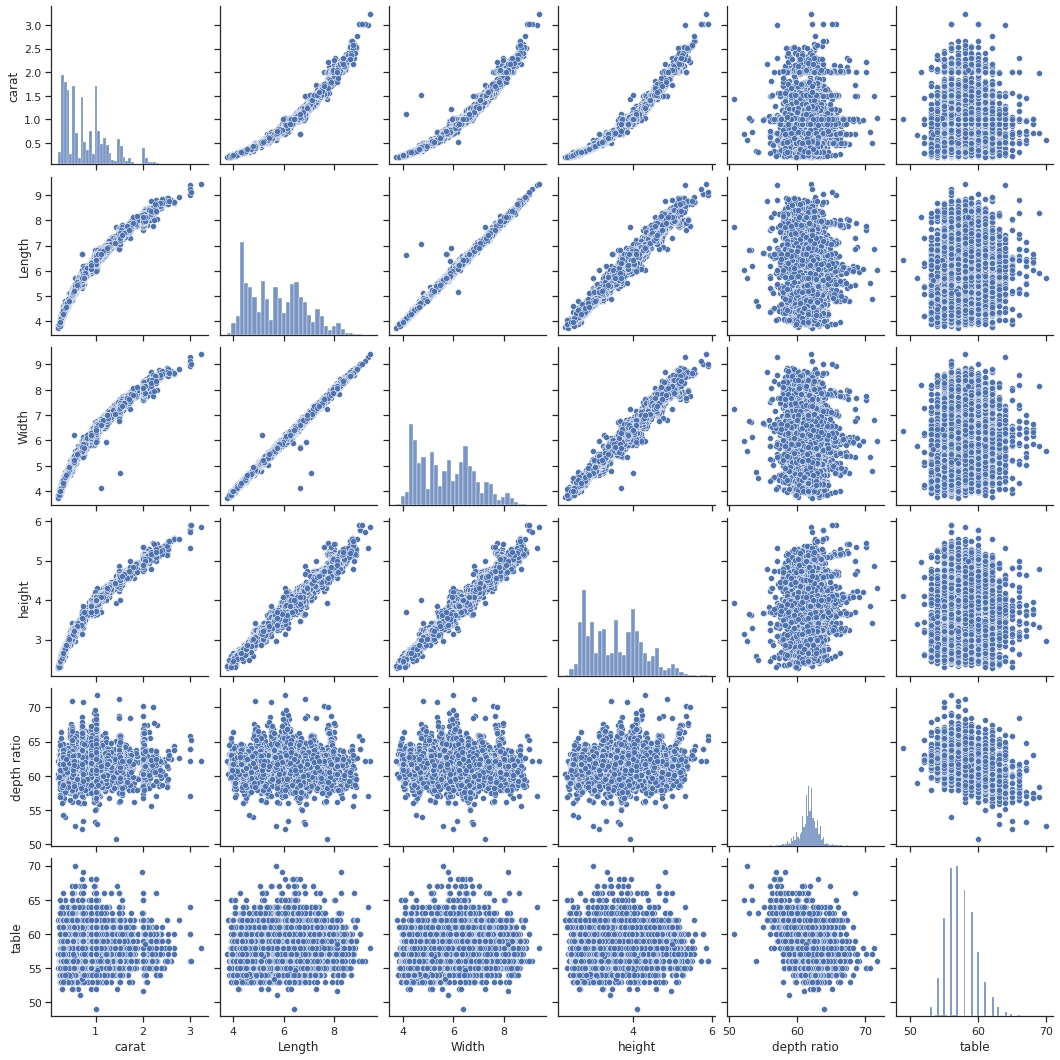

In [11]:
Diamonddata = Diamonddata[(Diamonddata["Width"]<50)]
Diamonddata = Diamonddata[(Diamonddata["height"]<30)]
Diamonddata = Diamonddata[(Diamonddata["carat"]<3.5)]
Diamonddata = Diamonddata[(Diamonddata["table"]<90)]
sns.pairplot(Diamonddata)

In [12]:
Diamonddata.describe()

,carat,Length,Width,height,depth ratio,table
count,9991.000000,9991.000000,9991.00000,9991.000000,9991.000000,9991.000000
mean,0.800492,5.737681,5.73803,3.542874,61.759794,57.448434
std,0.474970,1.126106,1.11672,0.692603,1.441781,2.209767
min,0.200000,3.760000,3.73000,2.270000,50.800000,49.000000
25%,0.400000,4.720000,4.72000,2.920000,61.100000,56.000000
50%,0.700000,5.690000,5.71000,3.530000,61.900000,57.000000
75%,1.050000,6.550000,6.55000,4.040000,62.500000,59.000000
max,3.240000,9.440000,9.40000,5.910000,71.800000,70.000000


In [13]:
Diamonddata.shape

(9991, 10)

###Convert Categorical data

In [14]:
lable_Diamonddata=Diamonddata.copy()

In [15]:
from sklearn.preprocessing import LabelEncoder
s = (lable_Diamonddata.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'colour', 'clarity', 'Grading']


In [16]:
label_encoder = LabelEncoder()

for col in object_cols:
    lable_Diamonddata[col] = label_encoder.fit_transform(lable_Diamonddata[col])
    
lable_Diamonddata.head()

,carat,cut,colour,clarity,Length,Width,height,depth ratio,table,Grading
0,1.20,4,4,3,6.74,6.77,4.25,62.9,56.0,2
1,0.60,2,3,7,5.37,5.41,3.31,61.4,59.0,2
2,0.23,2,3,1,3.93,3.96,2.48,62.8,55.0,0
3,1.51,4,0,5,7.29,7.34,4.56,62.3,59.0,1
4,1.01,4,0,7,6.51,6.57,3.94,60.2,58.0,1


In [17]:
lable_Diamonddata.describe()

,carat,cut,colour,clarity,Length,Width,height,depth ratio,table,Grading
count,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.00000,9991.000000,9991.000000,9991.000000,9991.000000
mean,0.800492,2.546992,2.617556,3.841357,5.737681,5.73803,3.542874,61.759794,57.448434,1.271144
std,0.474970,1.032102,1.697247,1.733540,1.126106,1.11672,0.692603,1.441781,2.209767,0.859527
min,0.200000,0.000000,0.000000,0.000000,3.760000,3.73000,2.270000,50.800000,49.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,4.720000,4.72000,2.920000,61.100000,56.000000,0.000000
50%,0.700000,2.000000,3.000000,4.000000,5.690000,5.71000,3.530000,61.900000,57.000000,2.000000
75%,1.050000,3.000000,4.000000,5.000000,6.550000,6.55000,4.040000,62.500000,59.000000,2.000000
max,3.240000,4.000000,6.000000,7.000000,9.440000,9.40000,5.910000,71.800000,70.000000,2.000000


In [18]:
lable_Diamonddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9991 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        9991 non-null   float64
 1   cut          9991 non-null   int64  
 2   colour       9991 non-null   int64  
 3   clarity      9991 non-null   int64  
 4   Length       9991 non-null   float64
 5   Width        9991 non-null   float64
 6   height       9991 non-null   float64
 7   depth ratio  9991 non-null   float64
 8   table        9991 non-null   float64
 9   Grading      9991 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 858.6 KB


In [19]:
y=lable_Diamonddata['Grading']

y.head()

0    2
1    2
2    0
3    1
4    1
Name: Grading, dtype: int64

In [20]:
x=lable_Diamonddata.drop('Grading',axis=1)


In [21]:
print(x)

      carat  cut  colour  clarity  Length  Width  height  depth ratio  table
0      1.20    4       4        3    6.74   6.77    4.25         62.9   56.0
1      0.60    2       3        7    5.37   5.41    3.31         61.4   59.0
2      0.23    2       3        1    3.93   3.96    2.48         62.8   55.0
3      1.51    4       0        5    7.29   7.34    4.56         62.3   59.0
4      1.01    4       0        7    6.51   6.57    3.94         60.2   58.0
...     ...  ...     ...      ...     ...    ...     ...          ...    ...
9995   0.30    4       1        3    4.29   4.33    2.66         61.7   61.0
9996   0.90    3       2        5    6.25   6.23    3.86         61.9   55.0
9997   0.54    4       1        2    5.24   5.15    3.23         62.2   61.0
9998   0.53    2       4        4    5.20   5.22    3.21         61.6   55.0
9999   1.57    3       5        3    7.43   7.36    4.60         62.2   60.0

[9991 rows x 9 columns]


In [22]:
print(y)

0       2
1       2
2       0
3       1
4       1
       ..
9995    0
9996    2
9997    2
9998    2
9999    2
Name: Grading, Length: 9991, dtype: int64


#Creat a test set

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20, random_state=42)

In [25]:
len(y_train)

7992

# Build a model

In [26]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [27]:
ovr_clf=OneVsRestClassifier(SVC(random_state=42))

In [28]:
from sklearn.utils import check_array
ovr_clf.fit(x,y)

OneVsRestClassifier(estimator=SVC(random_state=42))

#Performance Measure

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(ovr_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.71096096, 0.71133634, 0.70307808])